In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
raw_data = pd.read_excel (r'raw_data.xlsx')

# Análisis Exploratorio

#### Comenzamos echando un ojo a la data en crudo que tenemos. Es un dataset de 15 columnas por 197 filas. Cada columna representa una variable, las cuales tenemos que hacer una transformación previa para que los algoritmos de de Machine Learning de la librería Scikit-learn puedan interpretar estos datos.


In [3]:
raw_data


,País,Población,Densidad,%Riesgo Pobreza,Esperanza de vida,PIB p.Cap,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Salario Medio,Emis.CO2 p.cap.,Decesos,Casos confirmados,Decesos x Mill.,Continente
0,Afganistan,37.172.386,57.000,NaN,"64,49",447€,23$,3€,16.000,NaN,"0,29",1.481,40.026,"39,84",ASIA
1,Albania,2.845.955,99.000,NaN,"78,90",4.780€,129$,168€,36.000,NaN,"1,64",439.000,16.212,"154,25",EUROPA
2,Alemania,83.166.711,233.000,"16,7%","81,00",41.350€,2.022$,4.099€,80.000,52.185€,"9,15",9.739,352.107,"117,10",EUROPA
3,Andorra,77.543,165.000,NaN,"90,00",35.975€,1.371$,1.754€,nan,NaN,NaN,59.000,3.190,"760,87",EUROPA
4,Angola,30.809.762,25.000,NaN,"60,78",2.910€,125$,47€,19.000,NaN,"0,98",228.000,7.096,"7,40",AFRICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Yemen,28.498.687,54.000,NaN,"66,10",800€,60$,7€,14.000,NaN,"0,41",596.000,2.053,"20,91",ASIA
193,Yibuti,1.049.000,45.000,NaN,"66,58",2.359€,155$,29€,31.000,NaN,"1,08",61.000,5.443,"58,15",AFRICA
194,Zambia,17.351.822,23.000,NaN,"63,51",1.304€,72$,23€,35.000,NaN,"0,29",346.000,15.659,"19,94",AFRICA
195,Zimbabue,14.439.018,37.000,NaN,"61,20",1.818€,99$,50€,22.000,NaN,"0,77",231.000,8.075,"16,00",AFRICA


### De Strings a Numeric Values

#### Muchas de las columnas que tenemos, al hacer el web scraping, se han ingestado como strings. Son valores que tenemos que pasar a tipo numéricos. Abajo podemos ver el tipo de valor que tiene cada variable, debemos transformarlas a int o a float, según el caso.

In [4]:
raw_data.dtypes

País                   object
Población              object
Densidad              float64
%Riesgo Pobreza        object
Esperanza de vida      object
PIB p.Cap              object
Gasto Edu.p.Cap.       object
Gasto Salud p.Cap.     object
Índice Corrup.        float64
Salario Medio          object
Emis.CO2 p.cap.        object
Decesos               float64
Casos confirmados      object
Decesos x Mill.        object
Continente             object
dtype: object

In [5]:
raw_data['Población'] = raw_data['Población'].str.replace('\.','').astype(int)
raw_data['Esperanza de vida'] = raw_data['Esperanza de vida'].str.replace('\,','.').astype(float)
raw_data['PIB p.Cap'] = raw_data['PIB p.Cap'].str.replace('\€','')
raw_data['PIB p.Cap'] = raw_data['PIB p.Cap'].str.replace('\.','').astype(int)
raw_data['Gasto Edu.p.Cap.'] = raw_data['Gasto Edu.p.Cap.'].str.replace('\$','').str.replace('\.','')
raw_data['Gasto Edu.p.Cap.'] = raw_data['Gasto Edu.p.Cap.'].fillna(0)
raw_data['Gasto Edu.p.Cap.'] = raw_data['Gasto Edu.p.Cap.'].astype(int)
raw_data['Gasto Salud p.Cap.'] = raw_data['Gasto Salud p.Cap.'].str.replace('\€','').str.replace('\.','')
raw_data['Gasto Salud p.Cap.'] = raw_data['Gasto Salud p.Cap.'].fillna(0)
raw_data['Gasto Salud p.Cap.'] = raw_data['Gasto Salud p.Cap.'].astype(int)
raw_data['Emis.CO2 p.cap.'] = raw_data['Emis.CO2 p.cap.'].str.replace('\,','.').astype(float)
raw_data['Casos confirmados'] = raw_data['Casos confirmados'].str.replace('\.','')
raw_data['Casos confirmados'] = raw_data['Casos confirmados'].fillna(0)
raw_data['Casos confirmados'] = raw_data['Casos confirmados'].astype(float)
raw_data['Decesos x Mill.'] = raw_data['Decesos x Mill.'].str.replace('\.','').str.replace('\,','.')
raw_data['Decesos x Mill.'] = raw_data['Decesos x Mill.'].astype(float)

In [6]:
raw_data['Decesos'] = raw_data['Decesos'].round(decimals=3)
raw_data['Decesos'] = raw_data['Decesos'].fillna(0)
raw_data['Decesos'] = raw_data['Decesos'].apply("{:.3f}".format)
raw_data['Decesos'] = raw_data['Decesos'].astype(str)
raw_data['Decesos'] = raw_data['Decesos'].str.replace('\.000','')
raw_data['Decesos'] = raw_data['Decesos'].str.replace('\.','')
raw_data['Decesos'] = raw_data['Decesos'].astype(float)

In [7]:
raw_data['Densidad'] = raw_data['Densidad'].round(decimals=3)
raw_data['Densidad'] = raw_data['Densidad'].fillna(0)
raw_data['Densidad'] = raw_data['Densidad'].apply("{:.3f}".format)
raw_data['Densidad'] = raw_data['Densidad'].astype(str)
raw_data['Densidad'] = raw_data['Densidad'].str.replace('\.000','')
raw_data['Densidad'] = raw_data['Densidad'].str.replace('\.','')
raw_data['Densidad'] = raw_data['Densidad'].astype(int)

#### Luego de aplicar algunas transformaciones a las distintas columnas, he logrado obtener el formato adecuado para su procesamiento. Como podéis ver las columnas "%Riesgo Pobreza" y "Salario Medio", no las he tocado por los motivos que explico mas abajo. Ya tenemos todas las columnas con el tipo de variable que necesitamos (float e int según el caso):

In [8]:
raw_data.dtypes

País                   object
Población               int32
Densidad                int32
%Riesgo Pobreza        object
Esperanza de vida     float64
PIB p.Cap               int32
Gasto Edu.p.Cap.        int32
Gasto Salud p.Cap.      int32
Índice Corrup.        float64
Salario Medio          object
Emis.CO2 p.cap.       float64
Decesos               float64
Casos confirmados     float64
Decesos x Mill.       float64
Continente             object
dtype: object

# Missing Values

#### Una de las primeras cosas que debemos tener en cuenta son los Missing Values, es decir los valores vacíos que tiene el dataset. 

In [9]:
raw_data.isnull().sum()

País                    0
Población               0
Densidad                0
%Riesgo Pobreza       161
Esperanza de vida       4
PIB p.Cap               0
Gasto Edu.p.Cap.        0
Gasto Salud p.Cap.      0
Índice Corrup.         12
Salario Medio         156
Emis.CO2 p.cap.        13
Decesos                 0
Casos confirmados       0
Decesos x Mill.        14
Continente              1
dtype: int64

#### Podemos observar que la columna "%Riesgo de pobreza" tiene 161 valores vacíos (ósea que de 197 filas que tenemos, 161 se presentan nulas o vacías para esta variable), está claro que esta variable non nos servirá para el análisis. Lo mismo nos sucede con "Salario medio". Vamos a proceder a descartarlas para el análisis y tambien la última fila que indica la "Zona Euro" ya que no hace referencia a ningun pais y tiene la mayoría de sus columnas en Nan.

#### Los paises con menos de 1M de habitantes los descartaré por no aportar muchos datos contundentes sobre los decesos. También lo haré con los paises con mas de 500M, ya que forman parte de los outliers, los cuales afectan negativamente al modelo. Iré haciendo copias del dataset por si en algún momento me equivoco y tengo que retroceder.

In [10]:
data = raw_data.drop(['%Riesgo Pobreza','Salario Medio'],axis=1)
data.drop(data.tail(1).index, inplace = True) 
data = data[data.Población > 1000000]
data = data[data.Población < 500000000]

In [11]:
data.shape

(156, 13)

In [12]:
data.isnull().sum()

País                  0
Población             0
Densidad              0
Esperanza de vida     1
PIB p.Cap             0
Gasto Edu.p.Cap.      0
Gasto Salud p.Cap.    0
Índice Corrup.        0
Emis.CO2 p.cap.       3
Decesos               0
Casos confirmados     0
Decesos x Mill.       3
Continente            0
dtype: int64

#### Vemos que las columnas que tenían muchos missing values ya no están. Los Nan que han quedado, al representar menos del 5% de la data, podemos elimnar sus filas.


In [13]:
data = data.dropna()

In [14]:
data_without_nans = data.copy()

#### Antes de continuar voy a agregar la variable dependiente que me gustaría poder predecir que en este caso es la Tasa de Letalidad.

In [15]:
data_without_nans['Tasa de Letalidad'] = (data_without_nans['Decesos']/data_without_nans['Casos confirmados'])*100

#### Las variables dependientes como Decesos, Casos confirmados, y Decesos por Mill. también las quitaré porque para poder hacer predicciones con ellas necesitaríamos la variable tiempo, y ahí ya nos necesitaríamos de series temporales, que no es este caso.

In [16]:
data_without_nans = data_without_nans.drop(['Decesos','Casos confirmados','Decesos x Mill.'],axis=1)

In [17]:
data_without_nans

,País,Población,Densidad,Esperanza de vida,PIB p.Cap,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Emis.CO2 p.cap.,Continente,Tasa de Letalidad
0,Afganistan,37172386,57,64.490,447,23,3,16.000,0.290,ASIA,3.700
1,Albania,2845955,99,78.900,4780,129,168,36.000,1.640,EUROPA,2.708
2,Alemania,83166711,233,81.000,41350,2022,4099,80.000,9.150,EUROPA,2.766
4,Angola,30809762,25,60.780,2910,125,47,19.000,0.980,AFRICA,3.213
6,Arabia Saudita,33699947,16,75.000,21019,1036,703,49.000,18.630,ASIA,1.503
...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,95540395,288,75.320,2138,105,56,33.000,2.810,ASIA,3.114
192,Yemen,28498687,54,66.100,800,60,7,14.000,0.410,ASIA,29.031
193,Yibuti,1049000,45,66.580,2359,155,29,31.000,1.080,AFRICA,1.121
194,Zambia,17351822,23,63.510,1304,72,23,35.000,0.290,AFRICA,2.210


In [18]:
data_without_nans.shape

(149, 11)

#### Durante este proceso se me ha ocurrido agregar dos variables independiente mas que tal vez tenga relación con la tasa de letalidad, estas son las entradas anuales de personas a los distintos países a través de aeropuertos (el turismo en definitiva, del cual he conseguido un dataset del año 2017, que tampoco varían tanto de año a año) y la temperatura media anual de cada país. Voy a proceder a hacer un join entre las dos tablas para poder agregar estas variables al dataset principal.

In [19]:
df_temp_arrivals = pd.read_excel (r'df_temp_arrivals.xlsx')

In [20]:
df_temp_arrivals.shape

(155, 3)

In [21]:
data_without_nans_arrivals_temp = pd.merge(data_without_nans, df_temp_arrivals, how='left', left_on='País', right_on='País')

In [22]:
data_without_nans_arrivals_temp.shape


(149, 13)

In [23]:
data_without_nans_arrivals_temp

,País,Población,Densidad,Esperanza de vida,PIB p.Cap,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Emis.CO2 p.cap.,Continente,Tasa de Letalidad,Annual_temp,IT n. of arrivals 2017
0,Afganistan,37172386,57,64.490,447,23,3,16.000,0.290,ASIA,3.700,12.921,nan
1,Albania,2845955,99,78.900,4780,129,168,36.000,1.640,EUROPA,2.708,11.270,4643000.000
2,Alemania,83166711,233,81.000,41350,2022,4099,80.000,9.150,EUROPA,2.766,8.504,37452000.000
3,Angola,30809762,25,60.780,2910,125,47,19.000,0.980,AFRICA,3.213,21.511,261000.000
4,Arabia Saudita,33699947,16,75.000,21019,1036,703,49.000,18.630,ASIA,1.503,24.651,16109000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Vietnam,95540395,288,75.320,2138,105,56,33.000,2.810,ASIA,3.114,24.070,12922000.000
145,Yemen,28498687,54,66.100,800,60,7,14.000,0.410,ASIA,29.031,nan,nan
146,Yibuti,1049000,45,66.580,2359,155,29,31.000,1.080,AFRICA,1.121,nan,nan
147,Zambia,17351822,23,63.510,1304,72,23,35.000,0.290,AFRICA,2.210,21.584,1083000.000


In [24]:
data_without_nans_arrivals_temp.isnull().sum()

País                       0
Población                  0
Densidad                   0
Esperanza de vida          0
PIB p.Cap                  0
Gasto Edu.p.Cap.           0
Gasto Salud p.Cap.         0
Índice Corrup.             0
Emis.CO2 p.cap.            0
Continente                 0
Tasa de Letalidad          0
Annual_temp               28
IT n. of arrivals 2017    41
dtype: int64

In [25]:
data_without_nans_arrivals_temp.shape

(149, 13)

#### Los dataframes que he conseguido tienen muchísimos nans, uno 28 y otro 41, eliminar tantas filas podría afectar al modelo así que voy a optar por tratar estos nans, los sustituiré por la mediana (nunca por la media porque los outliers podrían afectar negativamente) de sus respectivas columnas.

In [26]:
data_without_nans_arrivals_temp['Annual_temp'] = data_without_nans_arrivals_temp['Annual_temp'].fillna(data_without_nans_arrivals_temp['Annual_temp'].median())
data_without_nans_arrivals_temp['IT n. of arrivals 2017'] = data_without_nans_arrivals_temp['IT n. of arrivals 2017'].fillna(data_without_nans_arrivals_temp['IT n. of arrivals 2017'].median())

### Una vez que ya tengo las variables independientes que me interesan con los missing values ya tratados, voy a analizar qué tipo de distribución tienen, y cómo es la correlación con la variable dependiente, en este caso la "Tasa de Letalidad".

In [27]:
dfcorr = data_without_nans_arrivals_temp[['Tasa de Letalidad','Población', 'Densidad', 'Esperanza de vida', 'PIB p.Cap',
       'Gasto Edu.p.Cap.', 'Gasto Salud p.Cap.', 'Índice Corrup.',
       'Emis.CO2 p.cap.','Annual_temp','IT n. of arrivals 2017']]

In [28]:
#fig, axes = plt.subplots(ncols=len(dfcorr.columns), figsize=(30,5))
#for ax, col in zip(axes, dfcorr.columns):
#  sns.distplot(dfcorr[col], ax=ax)
#  plt.tight_layout() 
#plt.show()

Text(0.5, 1.0, 'Esperanza de vida y Tasa de Letalidad')

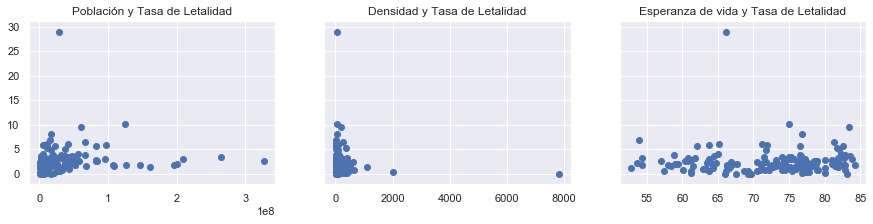

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_without_nans_arrivals_temp['Población'],data_without_nans_arrivals_temp['Tasa de Letalidad'])
ax1.set_title('Población y Tasa de Letalidad')
ax2.scatter(data_without_nans_arrivals_temp['Densidad'],data_without_nans_arrivals_temp['Tasa de Letalidad'])
ax2.set_title('Densidad y Tasa de Letalidad')
ax3.scatter(data_without_nans_arrivals_temp['Esperanza de vida'],data_without_nans_arrivals_temp['Tasa de Letalidad'])
ax3.set_title('Esperanza de vida y Tasa de Letalidad')


Text(0.5, 1.0, 'Índice Corrup. y Tasa de Letalidad')

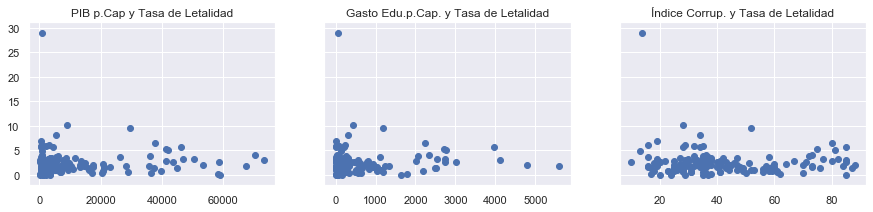

In [30]:
f, (ax4, ax5, ax6) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax4.scatter(data_without_nans_arrivals_temp['PIB p.Cap'],data_without_nans_arrivals_temp['Tasa de Letalidad'])
ax4.set_title('PIB p.Cap y Tasa de Letalidad')
ax5.scatter(data_without_nans_arrivals_temp['Gasto Edu.p.Cap.'],data_without_nans_arrivals_temp['Tasa de Letalidad'])
ax5.set_title('Gasto Edu.p.Cap. y Tasa de Letalidad')
ax6.scatter(data_without_nans_arrivals_temp['Índice Corrup.'],data_without_nans_arrivals_temp['Tasa de Letalidad'])
ax6.set_title('Índice Corrup. y Tasa de Letalidad')


Text(0.5, 1.0, 'IT n. of arrivals 2017 y Tasa de Letalidad')

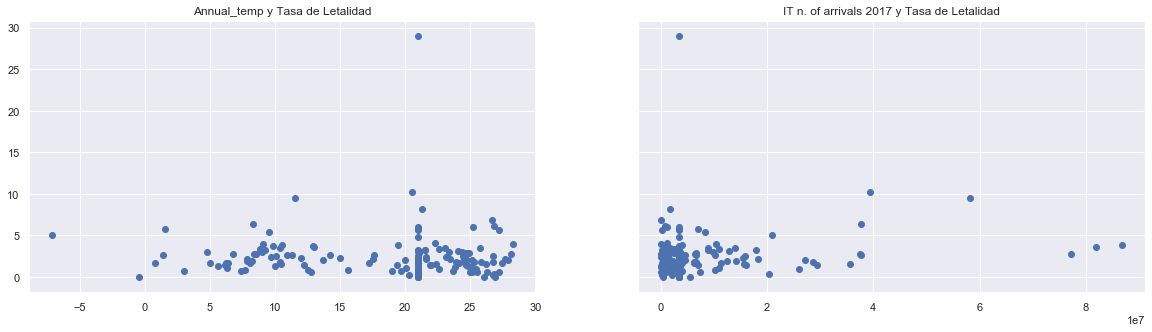

In [31]:
f, (ax7, ax8) = plt.subplots(1, 2, sharey=True, figsize =(20,5)) #sharey -> share 'Price' as y
ax7.scatter(data_without_nans_arrivals_temp['Annual_temp'],data_without_nans_arrivals_temp['Tasa de Letalidad'])
ax7.set_title('Annual_temp y Tasa de Letalidad')
ax8.scatter(data_without_nans_arrivals_temp['IT n. of arrivals 2017'],data_without_nans_arrivals_temp['Tasa de Letalidad'])
ax8.set_title('IT n. of arrivals 2017 y Tasa de Letalidad')



In [32]:
data_without_nans_arrivals_temp.columns


Index(['País', 'Población', 'Densidad', 'Esperanza de vida', 'PIB p.Cap',
       'Gasto Edu.p.Cap.', 'Gasto Salud p.Cap.', 'Índice Corrup.',
       'Emis.CO2 p.cap.', 'Continente', 'Tasa de Letalidad', 'Annual_temp',
       'IT n. of arrivals 2017'],
      dtype='object')

#### De los histogramas y de los scater plots puedo apreciar que son variables con mucha asimetría, y que la correlación con la variable dependiente es muy débil, por lo que haré una transformación logarítmica de todas las variables independientes y ver si esto me puede ayudar.

In [33]:
dataNumerica = data_without_nans_arrivals_temp.drop(['Continente'],axis=1)

In [34]:
log_data_with_nans = np.log(dataNumerica.drop(['País'],axis=1))

C:\Users\engel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\engel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [35]:
log_data_with_nans['País'] = data_without_nans_arrivals_temp['País']

In [36]:
log_data_with_nans.isnull().sum()

Población                 0
Densidad                  0
Esperanza de vida         0
PIB p.Cap                 0
Gasto Edu.p.Cap.          0
Gasto Salud p.Cap.        0
Índice Corrup.            0
Emis.CO2 p.cap.           0
Tasa de Letalidad         0
Annual_temp               2
IT n. of arrivals 2017    0
País                      0
dtype: int64

In [37]:
log_data_without_nans = log_data_with_nans.dropna()

In [38]:
# De esta manera podemos tratar los valores inf y -inf
log_data_without_nans = log_data_with_nans.replace([np.inf, -np.inf],0)

In [39]:
log_data_without_nans.isnull().sum()

Población                 0
Densidad                  0
Esperanza de vida         0
PIB p.Cap                 0
Gasto Edu.p.Cap.          0
Gasto Salud p.Cap.        0
Índice Corrup.            0
Emis.CO2 p.cap.           0
Tasa de Letalidad         0
Annual_temp               2
IT n. of arrivals 2017    0
País                      0
dtype: int64

In [40]:
df_distribution_log = log_data_without_nans.drop(['País'],axis=1)

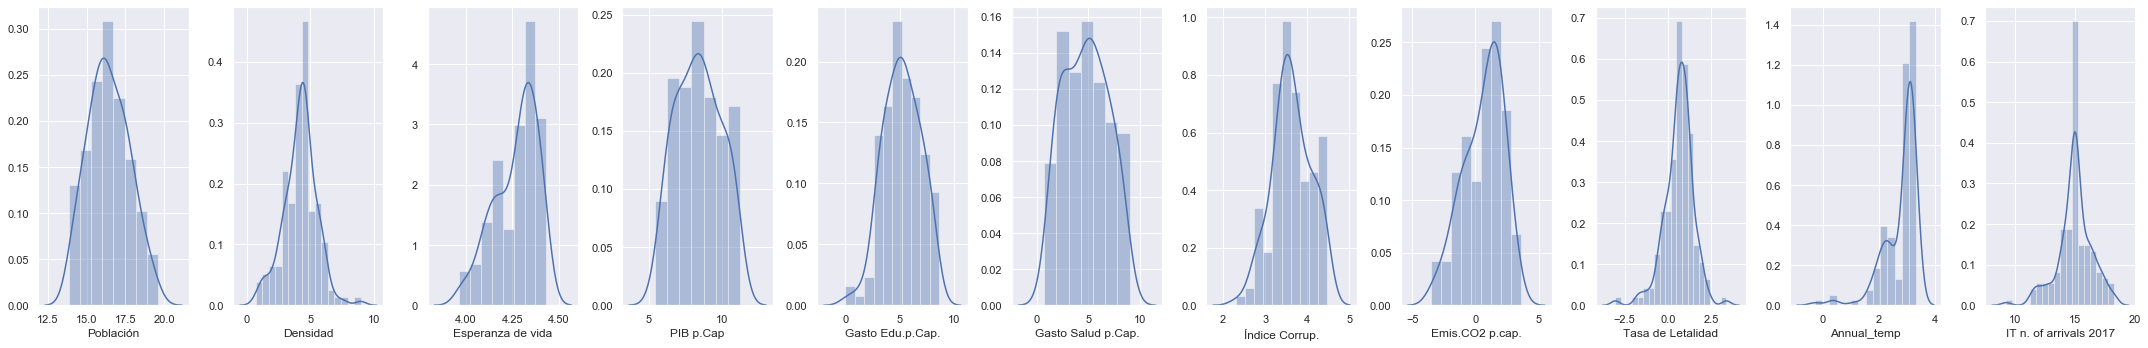

In [41]:
fig, axes = plt.subplots(ncols=len(df_distribution_log.columns), figsize=(30,5))
for ax, col in zip(axes, df_distribution_log.columns):
  sns.distplot(df_distribution_log[col], ax=ax)
  plt.tight_layout() 
plt.show()

### Veo que ha funcionado, y sus distribuciones se asemejan mas a una distribución normal. Voy a ver en un mapa de calor de correlaciones si estas han mejorado con respecto a la variable dependiente.

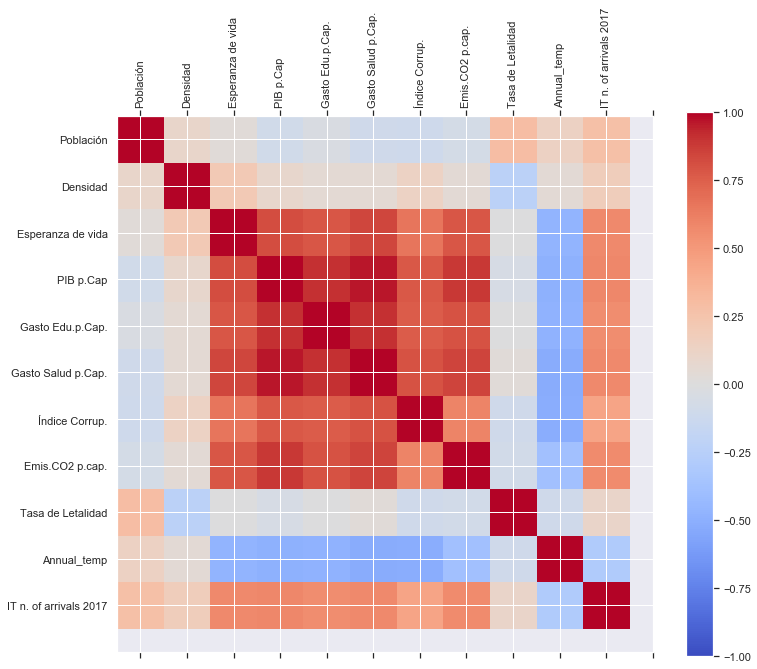

In [42]:
corr = log_data_without_nans.corr()
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(log_data_without_nans.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

### Tambien se puede apreciar en esta tabla con los valores mas precisos:

In [43]:
tablaCorrelation = log_data_without_nans.corr(method='pearson')

In [44]:
tablaCorrelation

,Población,Densidad,Esperanza de vida,PIB p.Cap,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Emis.CO2 p.cap.,Tasa de Letalidad,Annual_temp,IT n. of arrivals 2017
Población,1.000,0.095,0.027,-0.086,-0.032,-0.097,-0.106,-0.069,0.295,0.139,0.276
Densidad,0.095,1.000,0.205,0.088,0.049,0.052,0.129,0.040,-0.232,0.040,0.179
Esperanza de vida,0.027,0.205,1.000,0.815,0.783,0.838,0.657,0.787,-0.005,-0.466,0.577
PIB p.Cap,-0.086,0.088,0.815,1.000,0.911,0.963,0.773,0.885,-0.048,-0.485,0.581
Gasto Edu.p.Cap.,-0.032,0.049,0.783,0.911,1.000,0.910,0.763,0.803,-0.006,-0.482,0.561
Gasto Salud p.Cap.,-0.097,0.052,0.838,0.963,0.910,1.000,0.797,0.847,0.024,-0.523,0.572
Índice Corrup.,-0.106,0.129,0.657,0.773,0.763,0.797,1.000,0.595,-0.101,-0.513,0.440
Emis.CO2 p.cap.,-0.069,0.040,0.787,0.885,0.803,0.847,0.595,1.000,-0.080,-0.379,0.564
Tasa de Letalidad,0.295,-0.232,-0.005,-0.048,-0.006,0.024,-0.101,-0.080,1.000,-0.098,0.108
Annual_temp,0.139,0.040,-0.466,-0.485,-0.482,-0.523,-0.513,-0.379,-0.098,1.000,-0.294


### Me quedaré con las variables con la correlación mas alta

In [45]:
dataNumericaConMejorCorrelacion = log_data_without_nans[['Tasa de Letalidad','Población','Densidad','Índice Corrup.','Emis.CO2 p.cap.','Annual_temp','IT n. of arrivals 2017']]

In [46]:
dataNumericaConMejorCorrelacion


,Tasa de Letalidad,Población,Densidad,Índice Corrup.,Emis.CO2 p.cap.,Annual_temp,IT n. of arrivals 2017
0,1.308,17.431,4.043,2.773,-1.238,2.559,15.039
1,0.996,14.861,4.595,3.584,0.495,2.422,15.351
2,1.017,18.236,5.451,4.382,2.214,2.141,17.439
3,1.167,17.243,3.219,2.944,-0.020,3.069,12.472
4,0.408,17.333,2.773,3.892,2.925,3.205,16.595
...,...,...,...,...,...,...,...
144,1.136,18.375,5.663,3.497,1.033,3.181,16.374
145,3.368,17.165,3.989,2.639,-0.892,3.043,15.039
146,0.114,13.863,3.807,3.434,0.077,3.043,15.039
147,0.793,16.669,3.135,3.555,-1.238,3.072,13.895


In [47]:
dataNumericaConMejorCorrelacion.isnull().sum()

Tasa de Letalidad         0
Población                 0
Densidad                  0
Índice Corrup.            0
Emis.CO2 p.cap.           0
Annual_temp               2
IT n. of arrivals 2017    0
dtype: int64

In [48]:
dataNumericaConMejorCorrelacion['País'] = log_data_with_nans['País']

C:\Users\engel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
dataNumericaConMejorCorrelacion

,Tasa de Letalidad,Población,Densidad,Índice Corrup.,Emis.CO2 p.cap.,Annual_temp,IT n. of arrivals 2017,País
0,1.308,17.431,4.043,2.773,-1.238,2.559,15.039,Afganistan
1,0.996,14.861,4.595,3.584,0.495,2.422,15.351,Albania
2,1.017,18.236,5.451,4.382,2.214,2.141,17.439,Alemania
3,1.167,17.243,3.219,2.944,-0.020,3.069,12.472,Angola
4,0.408,17.333,2.773,3.892,2.925,3.205,16.595,Arabia Saudita
...,...,...,...,...,...,...,...,...
144,1.136,18.375,5.663,3.497,1.033,3.181,16.374,Vietnam
145,3.368,17.165,3.989,2.639,-0.892,3.043,15.039,Yemen
146,0.114,13.863,3.807,3.434,0.077,3.043,15.039,Yibuti
147,0.793,16.669,3.135,3.555,-1.238,3.072,13.895,Zambia


In [50]:
dataNumericaConMejorCorrelacion = dataNumericaConMejorCorrelacion.dropna()

# Multicolinealidad

#### Voy a analizar la multicolineadlidad entre las variables independientes, y descartar alguna si es necesario.

In [51]:
dataNumericaConMejorCorrelacion.columns.values

array(['Tasa de Letalidad', 'Población', 'Densidad', 'Índice Corrup.',
       'Emis.CO2 p.cap.', 'Annual_temp', 'IT n. of arrivals 2017', 'País'],
      dtype=object)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables_multicolinealidad = dataNumericaConMejorCorrelacion[['Población', 'Densidad', 'Índice Corrup.',
       'Emis.CO2 p.cap.', 'Annual_temp', 'IT n. of arrivals 2017']]

In [53]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables_multicolinealidad.values, i) for i in range(variables_multicolinealidad.shape[1])]
vif["Features"] = variables_multicolinealidad.columns

In [54]:
vif

,VIF,Features
0,153.795,Población
1,13.430,Densidad
2,77.255,Índice Corrup.
3,1.964,Emis.CO2 p.cap.
4,25.000,Annual_temp
5,174.666,IT n. of arrivals 2017


#### Observo que 'IT n. of arrivals 2017' tiene el VIF mas alto así que decido descartarla para el modelo. Esto hará que las VIF de las otras variables también bajen.

In [55]:
data_no_multicollinearity = dataNumericaConMejorCorrelacion.drop(['IT n. of arrivals 2017'],axis=1)

# Lidiando con los Outliers

In [56]:
data_without_outliers = data_no_multicollinearity.copy()

In [57]:
data_without_outliers

,Tasa de Letalidad,Población,Densidad,Índice Corrup.,Emis.CO2 p.cap.,Annual_temp,País
0,1.308,17.431,4.043,2.773,-1.238,2.559,Afganistan
1,0.996,14.861,4.595,3.584,0.495,2.422,Albania
2,1.017,18.236,5.451,4.382,2.214,2.141,Alemania
3,1.167,17.243,3.219,2.944,-0.020,3.069,Angola
4,0.408,17.333,2.773,3.892,2.925,3.205,Arabia Saudita
...,...,...,...,...,...,...,...
144,1.136,18.375,5.663,3.497,1.033,3.181,Vietnam
145,3.368,17.165,3.989,2.639,-0.892,3.043,Yemen
146,0.114,13.863,3.807,3.434,0.077,3.043,Yibuti
147,0.793,16.669,3.135,3.555,-1.238,3.072,Zambia


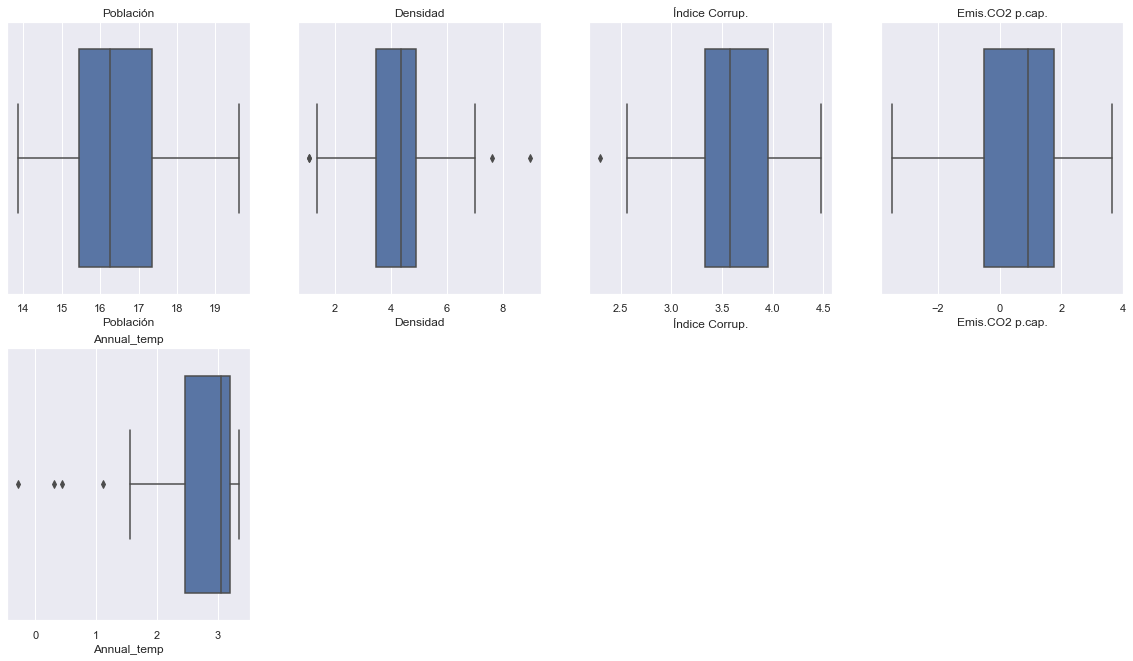

In [58]:
fig = plt.figure(figsize = (20,11))
for i in range(1,6):
    df_boxplot = plt.subplot(2,4,i, title = data_without_outliers.columns[i])
    sns.boxplot(data_without_outliers[data_without_outliers.columns[i]])

#### La variable Annual_temp es la que mas outliers presenta, de momento me ocuparé de estos, mientras que en 'Densidad' e 'Indice corrup.' los dejaré de momento.

In [59]:
Q1 = np.percentile(data_without_outliers['Annual_temp'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data_without_outliers['Annual_temp'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data_without_outliers['Annual_temp'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

Q1 25 percentile of the given data is,  2.4625923602525455
Q1 50 percentile of the given data is,  3.0433326843474773
Q1 75 percentile of the given data is,  3.197531165925893
Interquartile range is 0.7349388056733477


In [60]:
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

low_limit is 1.360184151742524
up_limit is 4.2999393744359145


In [61]:
data_without_outliers['Annual_temp'] = np.where(data_without_outliers['Annual_temp'] < 1.36, 3.04, data_without_outliers['Annual_temp'])


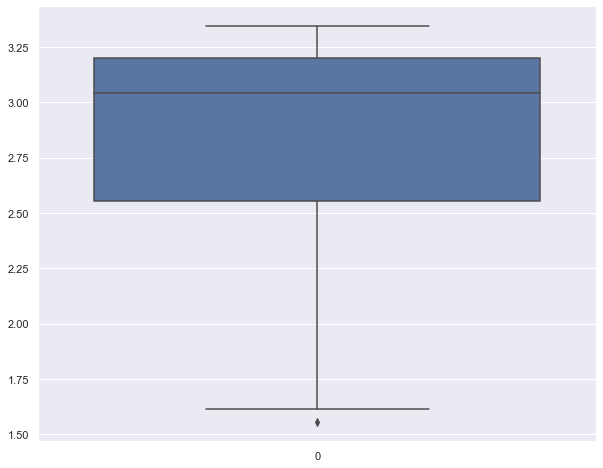

In [62]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(data = data_without_outliers['Annual_temp'])

#### Solo ha quedado un outlier muy cercano al 25 percentil. Lo que hice fue remplazar los valores que estaban por debajo de 1.36 por la mediana de 'Temp_ann'

# Variables Dummies

### Ahora me voy a ocupar de las variables categóricas

In [63]:
data_with_dummies = pd.get_dummies(data_without_nans_arrivals_temp['Continente'], drop_first=True)

In [64]:
data_with_dummies['País'] = data_without_nans_arrivals_temp['País']

In [65]:
data_with_dummies.head()

,AMERICA,ASIA,EUROPA,OCEANIA,País
0,0,1,0,0,Afganistan
1,0,0,1,0,Albania
2,0,0,1,0,Alemania
3,0,0,0,0,Angola
4,0,1,0,0,Arabia Saudita


# Reordenando el dataset

In [66]:
data_cleaned = pd.merge(data_without_outliers, data_with_dummies, how='left', left_on='País', right_on='País')
data_cleaned = data_cleaned.drop(['País'],axis=1)

In [67]:
data_preprocessed = data_cleaned.copy()
data_preprocessed

,Tasa de Letalidad,Población,Densidad,Índice Corrup.,Emis.CO2 p.cap.,Annual_temp,AMERICA,ASIA,EUROPA,OCEANIA
0,1.308,17.431,4.043,2.773,-1.238,2.559,0,1,0,0
1,0.996,14.861,4.595,3.584,0.495,2.422,0,0,1,0
2,1.017,18.236,5.451,4.382,2.214,2.141,0,0,1,0
3,1.167,17.243,3.219,2.944,-0.020,3.069,0,0,0,0
4,0.408,17.333,2.773,3.892,2.925,3.205,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
142,1.136,18.375,5.663,3.497,1.033,3.181,0,1,0,0
143,3.368,17.165,3.989,2.639,-0.892,3.043,0,1,0,0
144,0.114,13.863,3.807,3.434,0.077,3.043,0,0,0,0
145,0.793,16.669,3.135,3.555,-1.238,3.072,0,0,0,0


In [68]:
data_preprocessed.to_excel("data_preprocessed.xlsx", sheet_name='data_preprocessed', index=False)   